In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-whitegrid')
import numpy as np
from matplotlib.pyplot import figure
import itertools
import random
import pandas as pd


## Plot Input Noisy Data

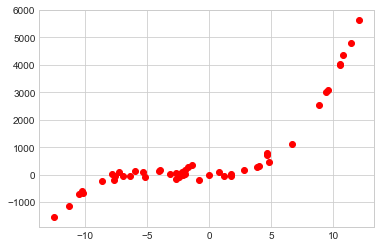

In [2]:
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.5)
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

## Plot Noisy Data & Polynomial

[[-2.64575348e-04]
 [ 2.95630778e-03]
 [ 2.01398419e+00]
 [ 1.41540807e+01]
 [ 3.23904005e+00]
 [ 5.23772539e+00]]


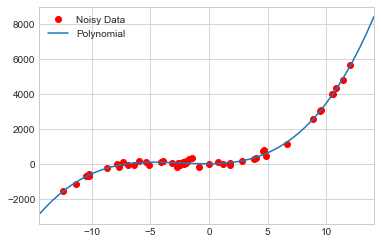

In [3]:
x = x.flatten()
coefficients = np.polyfit(x, y, 5)
print (coefficients) # In form of ..... + Ax^2 + Bx + C
coefficients = coefficients.flatten() #Flatten 2D data to 1D
polynomial = np.poly1d(coefficients)
polynomial_x = np.linspace(np.min(x)-2, np.max(x)+2)
polynomial_y = polynomial(polynomial_x)
predicted_y = polynomial(x)
plt.xlim([np.min(x)-2, np.max(x)+2 ])
plt.plot(x, y, 'ro', label = 'Noisy Data')
plt.plot(polynomial_x,polynomial_y,'-',label = 'Polynomial')
plt.legend()
plt.show()

## Genetic Algorithm

In [4]:
chromosomes = []
combinations = []
data = [0,1,2,3,4,5,6,7,8,9]
for i in range(100):

    chromosomes.append([random.randint(1,10) for i in range(6)])
    
chromosomes = np.asarray(chromosomes)
chromosomes[1]

array([6, 1, 4, 9, 9, 7])

In [5]:
#Crossover operation combinations generate
for element in itertools.permutations(data, 2):
    combinations.append(element)
    
poly_genes = [0] * 100
badness = [0] * 100
best = [0] * 100
mutation_rate=0.1
crossover_rate=0.5

for _ in range (500):
    for i in range(100):
        poly_genes[i]=np.poly1d(chromosomes[i])
        mse = 0
        for j, x_val in enumerate(x):
            mse += (y[j]-poly_genes[i](x_val))**2/number_of_samples
        badness[i]=mse[0]

    badness = np.asarray(badness)
    index_ten_best = np.argsort(badness)[:10]
    best[:10]=chromosomes[index_ten_best]
    #print (best)
    for i in range(90):
        best[i+10]=best[combinations[i][0]]
        for k in range(6):
            #Crossover Operation
            if random.uniform(0,1)<crossover_rate:
                best[i+10][k]=best[combinations[i][1]][k]
            #Mutation Operation
            if random.uniform(0,1)<mutation_rate:
                best[i+10][k]=best[i+10][k]*random.uniform(0,2)
    
    best = np.asarray(best)
    #print (best)
    chromosomes=best


In [6]:
for i in range(100):

  poly_genes[i]=np.poly1d(chromosomes[i])
  mse=0
  for k, x_val in enumerate(x):

    mse += (y[k]-poly_genes[i](x_val))**2/number_of_samples
  mse[0]
  badness[i]=mse


index_ten_best = np.argsort(badness)[:10]
poly_genes[index_ten_best[0]]
badness[index_ten_best[0]]

12601.19809814016

## Plot Noisy Data, Polynomial & Genetic Algorithm generated polynomial

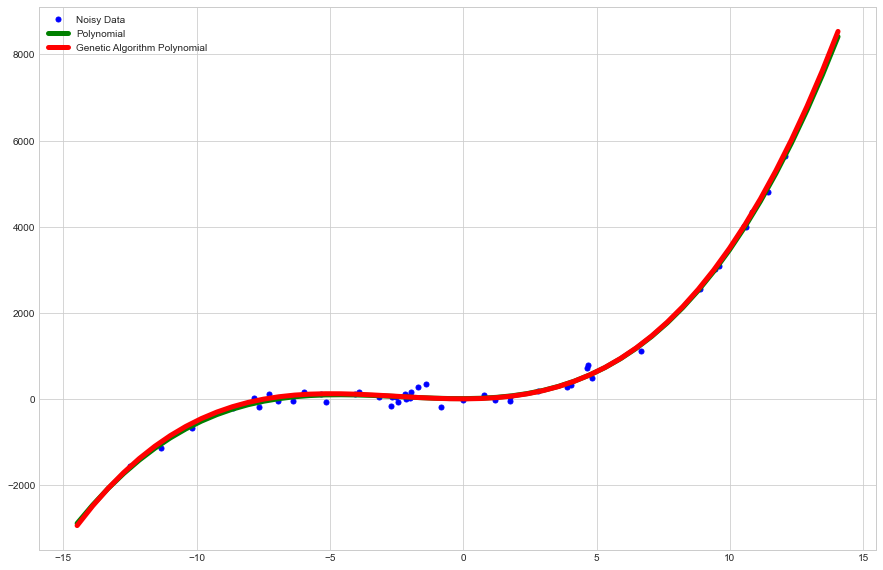

In [14]:
genetic_polynomial = poly_genes[index_ten_best[0]]

plt.plot(x, y, 'bo', label = 'Noisy Data', markersize=5)
plt.plot(polynomial_x,polynomial_y,color='green',label = 'Polynomial',linewidth=5)
plt.plot(polynomial_x,genetic_polynomial(polynomial_x), color='red', label = 'Genetic Algorithm Polynomial',linewidth=5)
plt.legend()
plt.rcParams["figure.figsize"] = (15,8)
plt.show()



## From above plot, we can see that Genetic Algorithm generated polynomial is similar to Normal Equation polynomial